In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from api_keys import football_com

In [3]:
api_key = f'&APIkey={football_com}'
action = 'action=get_countries'
url = f'https://apiv3.apifootball.com/?{action}{api_key}'

response = requests.get(url)
response.json()

[{'country_id': '290', 'country_name': 'Cuba', 'country_logo': ''},
 {'country_id': '168', 'country_name': 'Pakistan', 'country_logo': ''},
 {'country_id': '44',
  'country_name': 'England',
  'country_logo': 'https://apiv3.apifootball.com/badges/logo_country/44_england.png'},
 {'country_id': '6',
  'country_name': 'Spain',
  'country_logo': 'https://apiv3.apifootball.com/badges/logo_country/6_spain.png'},
 {'country_id': '3',
  'country_name': 'France',
  'country_logo': 'https://apiv3.apifootball.com/badges/logo_country/3_france.png'},
 {'country_id': '4',
  'country_name': 'Germany',
  'country_logo': 'https://apiv3.apifootball.com/badges/logo_country/4_germany.png'},
 {'country_id': '5',
  'country_name': 'Italy',
  'country_logo': 'https://apiv3.apifootball.com/badges/logo_country/5_italy.png'},
 {'country_id': '82',
  'country_name': 'Netherlands',
  'country_logo': 'https://apiv3.apifootball.com/badges/logo_country/82_netherlands.png'},
 {'country_id': '27',
  'country_name': 'B

In [4]:
# England Premier League Teams Info

league = 152
action = f'action=get_teams&league_id={league}'
url = f'https://apiv3.apifootball.com/?{action}{api_key}'

teams_response = requests.get(url).json()
teams_df = pd.DataFrame(teams_response)

In [5]:
teams_response

[{'team_key': '80',
  'team_name': 'Manchester City',
  'team_badge': 'https://apiv3.apifootball.com/badges/80_manchester-city.jpg',
  'players': [{'player_key': 1226924072,
    'player_id': '1226924072',
    'player_image': 'https://apiv3.apifootball.com/badges/players/8433_s-ortega.jpg',
    'player_name': 'S. Ortega',
    'player_number': '18',
    'player_country': '',
    'player_type': 'Goalkeepers',
    'player_age': '30',
    'player_match_played': '1',
    'player_goals': '0',
    'player_yellow_cards': '0',
    'player_red_cards': '0',
    'player_injured': 'No',
    'player_substitute_out': '0',
    'player_substitutes_on_bench': '33',
    'player_assists': '0',
    'player_birthdate': '1992-11-06',
    'player_is_captain': '0',
    'player_shots_total': '',
    'player_goals_conceded': '0',
    'player_fouls_committed': '',
    'player_tackles': '',
    'player_blocks': '',
    'player_crosses_total': '',
    'player_interceptions': '',
    'player_clearances': '1',
    'pl

In [6]:
player_count = 0
for i, players in enumerate(teams_response):
    player_count += len(teams_response[i]['players'])
player_count

667

In [7]:
player_data = []

for i, teams in enumerate(teams_response):
    team_name = teams_response[i]['team_name']
    for players in teams['players']:
        player_name = players['player_name']
        player_type = players['player_type']
        player_age = players['player_age']
        player_match_played = players['player_match_played']
        player_goals = players['player_goals']
        player_yellow_cards = players['player_yellow_cards']
        player_red_cards = players['player_red_cards']
        player_assists = players['player_assists']
        player_shots_total = players['player_shots_total']
        player_goals_conceded = players['player_goals_conceded']
        player_fouls_committed = players['player_fouls_committed']
        player_tackles = players['player_tackles']
        player_blocks = players['player_blocks']
#         player_crosses_total = players['player_crosses_total']
        player_interceptions = players['player_interceptions']
        player_clearances = players['player_clearances']
        player_saves = players['player_saves']
        player_passes = players['player_passes']
        player_passes_accuracy = players['player_passes_accuracy']
        
        
        player_data.append({
            'Team Name':team_name,
            'Player Name':player_name,
            'Player Type':player_type,
            'Player Age':player_age,
            'Matches Played':player_match_played,
            'Goals':player_goals,
            'Yellow Cards':player_yellow_cards,
            'Red Cards':player_red_cards,
            'Fouls':player_fouls_committed,
            'Assists':player_assists,
            'Shots on Goal':player_shots_total,
            'Goals Conceded':player_goals_conceded,
            'Tackles':player_tackles,
            'Blocks':player_blocks,
            'Interceptions':player_interceptions,
            'Saves':player_saves,
            'Passes':player_passes,
            'Accurate Passes':player_passes_accuracy
        })
player_df = pd.DataFrame(player_data)
player_df.to_csv('output/players.csv')
player_df

Team Name       Player Name  Player Type Player Age Matches Played  \
0    Manchester City         S. Ortega  Goalkeepers         30              1   
1    Manchester City           Ederson  Goalkeepers         29             33   
2    Manchester City         S. Carson  Goalkeepers         37              0   
3    Manchester City         K. Walker    Defenders         32             23   
4    Manchester City        Rúben Dias    Defenders         25             25   
..               ...               ...          ...        ...            ...   
662   Crystal Palace           J. Ayew     Forwards         31             34   
663   Crystal Palace           W. Zaha     Forwards         30             25   
664   Crystal Palace         J. Mateta     Forwards         25             27   
665   Crystal Palace        O. Édouard     Forwards         25             31   
666   Crystal Palace  Adler Nascimento     Forwards         18              0   

    Goals Yellow Cards Red Cards Fouls Assists Shots on Goal Goals Conceded  \
0       0            0         0             0                            0   
1       0            3         0     1       1                           31   
2       0            0         0             0                            0   
3       0            3         0    11       0             3              0   
4       0            3         0    19       0             7              0   
..    ...          ...       ...   ...     ...           ...            ...   
662     4            4         0    44       2            18              0   
663     7            4         0    32       2            37              0   
664     2            3         0    14       0            19              0   
665     4            3         0    26       2            23              0   
666     0            0         0             0                                

    Tackles Blocks Interceptions Saves Passes Accurate Passes  
0                                    2     43              39  
1         3                    1    41   1037             876  
2                                                              
3        11      2            15         1455            1296  
4        21     11            18         1974            1828  
..      ...    ...           ...   ...    ...             ...  
662      62      2            15          724             579  
663      32      1            15          543             440  
664       6      1             3          141              98  
665      24      5             3          370             270  
666                                                            

[667 rows x 18 columns]

In [76]:
cols = player_df.columns.drop(['Team Name', 'Player Name', 'Player Type'])
player_df[cols] = player_df[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
player_df

Team Name       Player Name  Player Type  Player Age  \
0    Manchester City         S. Ortega  Goalkeepers          30   
1    Manchester City           Ederson  Goalkeepers          29   
2    Manchester City         S. Carson  Goalkeepers          37   
3    Manchester City         K. Walker    Defenders          32   
4    Manchester City        Rúben Dias    Defenders          25   
..               ...               ...          ...         ...   
662   Crystal Palace           J. Ayew     Forwards          31   
663   Crystal Palace           W. Zaha     Forwards          30   
664   Crystal Palace         J. Mateta     Forwards          25   
665   Crystal Palace        O. Édouard     Forwards          25   
666   Crystal Palace  Adler Nascimento     Forwards          18   

     Matches Played  Goals  Yellow Cards  Red Cards  Fouls  Assists  \
0                 1      0             0          0    0.0        0   
1                33      0             3          0    1.0        1   
2                 0      0             0          0    0.0        0   
3                23      0             3          0   11.0        0   
4                25      0             3          0   19.0        0   
..              ...    ...           ...        ...    ...      ...   
662              34      4             4          0   44.0        2   
663              25      7             4          0   32.0        2   
664              27      2             3          0   14.0        0   
665              31      4             3          0   26.0        2   
666               0      0             0          0    0.0        0   

     Shots on Goal  Goals Conceded  Tackles  Blocks  Interceptions  Saves  \
0              0.0             0.0      0.0     0.0            0.0    2.0   
1              0.0            31.0      3.0     0.0            1.0   41.0   
2              0.0             0.0      0.0     0.0            0.0    0.0   
3              3.0             0.0     11.0     2.0           15.0    0.0   
4              7.0             0.0     21.0    11.0           18.0    0.0   
..             ...             ...      ...     ...            ...    ...   
662           18.0             0.0     62.0     2.0           15.0    0.0   
663           37.0             0.0     32.0     1.0           15.0    0.0   
664           19.0             0.0      6.0     1.0            3.0    0.0   
665           23.0             0.0     24.0     5.0            3.0    0.0   
666            0.0             0.0      0.0     0.0            0.0    0.0   

     Passes  Accurate Passes  Age Range  
0      43.0             39.0        0.0  
1    1037.0            876.0        0.0  
2       0.0              0.0        0.0  
3    1455.0           1296.0        0.0  
4    1974.0           1828.0        0.0  
..      ...              ...        ...  
662   724.0            579.0        0.0  
663   543.0            440.0        0.0  
664   141.0             98.0        0.0  
665   370.0            270.0        0.0  
666     0.0              0.0        0.0  

[667 rows x 19 columns]

In [83]:
ages = player_df['Player Age'].unique()
buckets = [0, 20, 26, 30, 36, 100]
labels = ['<20', '20-25', ' 26-30', '31-35', '>35']
player_df['Age Range'] = pd.cut(player_df['Player Age'], buckets, labels=labels)
player_df['Pass %'] = round((player_df['Accurate Passes']/player_df['Passes']*100), 2).fillna(0)
player_df

Team Name       Player Name  Player Type  Player Age  \
0    Manchester City         S. Ortega  Goalkeepers          30   
1    Manchester City           Ederson  Goalkeepers          29   
2    Manchester City         S. Carson  Goalkeepers          37   
3    Manchester City         K. Walker    Defenders          32   
4    Manchester City        Rúben Dias    Defenders          25   
..               ...               ...          ...         ...   
662   Crystal Palace           J. Ayew     Forwards          31   
663   Crystal Palace           W. Zaha     Forwards          30   
664   Crystal Palace         J. Mateta     Forwards          25   
665   Crystal Palace        O. Édouard     Forwards          25   
666   Crystal Palace  Adler Nascimento     Forwards          18   

     Matches Played  Goals  Yellow Cards  Red Cards  Fouls  Assists  \
0                 1      0             0          0    0.0        0   
1                33      0             3          0    1.0        1   
2                 0      0             0          0    0.0        0   
3                23      0             3          0   11.0        0   
4                25      0             3          0   19.0        0   
..              ...    ...           ...        ...    ...      ...   
662              34      4             4          0   44.0        2   
663              25      7             4          0   32.0        2   
664              27      2             3          0   14.0        0   
665              31      4             3          0   26.0        2   
666               0      0             0          0    0.0        0   

     Shots on Goal  Goals Conceded  Tackles  Blocks  Interceptions  Saves  \
0              0.0             0.0      0.0     0.0            0.0    2.0   
1              0.0            31.0      3.0     0.0            1.0   41.0   
2              0.0             0.0      0.0     0.0            0.0    0.0   
3              3.0             0.0     11.0     2.0           15.0    0.0   
4              7.0             0.0     21.0    11.0           18.0    0.0   
..             ...             ...      ...     ...            ...    ...   
662           18.0             0.0     62.0     2.0           15.0    0.0   
663           37.0             0.0     32.0     1.0           15.0    0.0   
664           19.0             0.0      6.0     1.0            3.0    0.0   
665           23.0             0.0     24.0     5.0            3.0    0.0   
666            0.0             0.0      0.0     0.0            0.0    0.0   

     Passes  Accurate Passes Age Range  Pass %  
0      43.0             39.0     26-30   90.70  
1    1037.0            876.0     26-30   84.47  
2       0.0              0.0       >35    0.00  
3    1455.0           1296.0     31-35   89.07  
4    1974.0           1828.0     20-25   92.60  
..      ...              ...       ...     ...  
662   724.0            579.0     31-35   79.97  
663   543.0            440.0     26-30   81.03  
664   141.0             98.0     20-25   69.50  
665   370.0            270.0     20-25   72.97  
666     0.0              0.0       <20    0.00  

[667 rows x 20 columns]

In [81]:
goalkeepers = player_df.loc[player_df['Player Type'] == 'Goalkeepers']
defenders = player_df.loc[player_df['Player Type'] == 'Defenders']
midfielders = player_df.loc[player_df['Player Type'] == 'Midfielders']
forwards = player_df.loc[player_df['Player Type'] == 'Forwards']

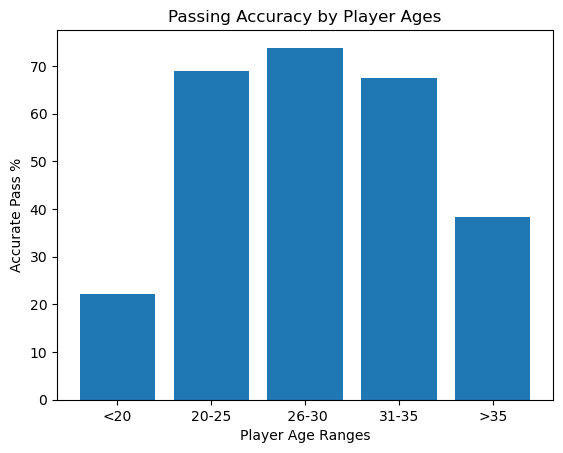

In [91]:
player_mean_df = round((player_df.groupby(['Age Range']).mean().reset_index()), 2)

plt.bar(player_mean_df['Age Range'], player_mean_df['Pass %'])

plt.title('Passing Accuracy by Player Ages')
plt.xlabel('Player Age Ranges')
plt.ylabel('Accurate Pass %')

plt.savefig('output/Ages_v_Passing')
plt.show()

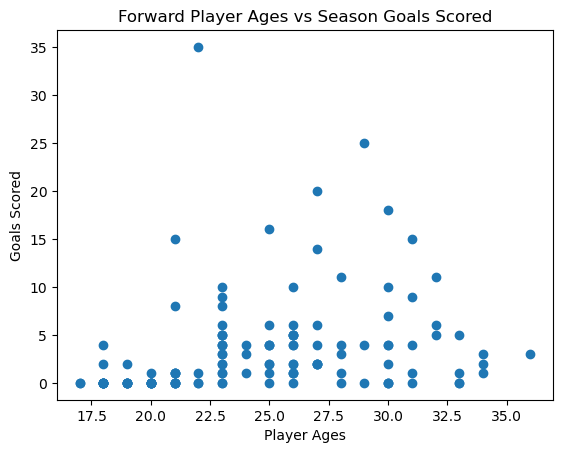

In [97]:
plt.scatter(forwards['Player Age'], forwards['Goals'])

plt.title('Forward Player Ages vs Season Goals Scored')
plt.xlabel('Player Ages')
plt.ylabel('Goals Scored')

plt.show()

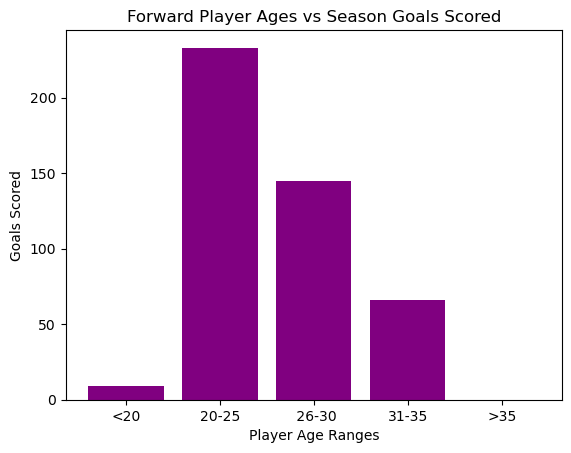

In [98]:
forwards = forwards.sort_values(by='Player Age')
goals_scored_df = forwards.groupby(['Age Range']).sum().reset_index()

plt.bar(goals_scored_df['Age Range'], goals_scored_df['Goals'], color='purple')

plt.title('Forward Player Ages vs Season Goals Scored')
plt.xlabel('Player Age Ranges')
plt.ylabel('Goals Scored')

plt.savefig('output/Ages_v_Goals_Bar')
plt.show()

In [6]:
# England Premier League Events Data

start = '2022-08-06'
end = '2023-05-09'
action = f'action=get_events&from={start}&to={end}&league_id={league}'
url = f'https://apiv3.apifootball.com/?{action}{api_key}'

games_response = requests.get(url).json()
games_response

# Index 145 is when statistics start to get added, round 17 in the league's season

[{'match_id': '112215',
  'country_id': '44',
  'country_name': 'England',
  'league_id': '152',
  'league_name': 'Premier League',
  'match_date': '2022-08-06',
  'match_status': 'Finished',
  'match_time': '13:30',
  'match_hometeam_id': '3085',
  'match_hometeam_name': 'Fulham',
  'match_hometeam_score': '2',
  'match_awayteam_name': 'Liverpool',
  'match_awayteam_id': '84',
  'match_awayteam_score': '2',
  'match_hometeam_halftime_score': '1',
  'match_awayteam_halftime_score': '0',
  'match_hometeam_extra_score': '',
  'match_awayteam_extra_score': '',
  'match_hometeam_penalty_score': '',
  'match_awayteam_penalty_score': '',
  'match_hometeam_ft_score': '2',
  'match_awayteam_ft_score': '2',
  'match_hometeam_system': '',
  'match_awayteam_system': '',
  'match_live': '0',
  'match_round': '1',
  'match_stadium': 'Craven Cottage (London)',
  'match_referee': 'A. Madley',
  'team_home_badge': 'https://apiv3.apifootball.com/badges/3085_fulham.jpg',
  'team_away_badge': 'https://ap

In [7]:
# Dataframe for games
games_data = []

for i, game in enumerate(games_response):
    match_id = games_response[i]['match_id']
    date = games_response[i]['match_date']
    home_team = games_response[i]['match_hometeam_name']
    away_team = games_response[i]['match_awayteam_name']
    home_team_formation = games_response[i]['match_hometeam_system']
    away_team_formation = games_response[i]['match_awayteam_system']
    home_team_score = games_response[i]['match_hometeam_score']
    away_team_score = games_response[i]['match_awayteam_score']
    
    home_team_free_kicks = ''
    away_team_free_kicks = ''
    home_team_goal_kicks = ''
    away_team_goal_kicks = ''
    home_team_shots_total = ''
    away_team_shots_total = ''
    home_team_shots_on_goal = ''
    away_team_shots_on_goal = ''
    home_team_shots_off_goal = ''
    away_team_shots_off_goal = ''
    
    for statistics in game['statistics']:
        if statistics['type'] == 'Free Kick':
            home_team_free_kicks = statistics['home']
            away_team_free_kicks = statistics['away']
        if statistics['type'] == 'Goal Kick':
            home_team_goal_kicks = statistics['home']
            away_team_goal_kicks = statistics['away']
        if statistics['type'] == 'Shots Total':
            home_team_shots_total = statistics['home']
            away_team_shots_total = statistics['away']
        if statistics['type'] == 'Shots On Goal':
            home_team_shots_on_goal = statistics['home']
            away_team_shots_on_goal = statistics['away']
        if statistics['type'] == 'Shots Off Goal':
            home_team_shots_off_goal = statistics['home']
            away_team_shots_off_goal = statistics['away']
        
    games_data.append({
        'Match ID':match_id,
        'Date':date,
        'Home Team':home_team,
        'Home Team: Score':home_team_score,
        'Home Team: Formation':home_team_formation,
        'Home Team: Free Kicks':home_team_free_kicks,
        'Home Team: Goal Kicks':home_team_goal_kicks,
        'Home Team: Shots Total':home_team_shots_total,
        'Away Team':away_team,
        'Away Team: Score':away_team_score,
        'Away Team: Formation':away_team_formation,
        'Away Team: Free Kicks':away_team_free_kicks,
        'Away Team: Goal Kicks':away_team_goal_kicks,
        'Away Team: Shots Total':away_team_shots_total
    })

# Due to formatting all values in DataFrame are currently strings
games_df = pd.DataFrame(games_data)
games_df

Match ID        Date          Home Team Home Team: Score  \
0     112215  2022-08-06             Fulham                2   
1     112216  2022-08-06    AFC Bournemouth                2   
2     112217  2022-08-06       Leeds United                2   
3     112218  2022-08-06   Newcastle United                2   
4     112219  2022-08-06  Tottenham Hotspur                4   
..       ...         ...                ...              ...   
342   112549  2023-05-07          Newcastle                0   
343   112552  2023-05-07           West Ham                1   
344   112545  2023-05-08           Brighton                1   
345   112546  2023-05-08             Fulham                5   
346   112550  2023-05-08         Nottingham                4   

    Home Team: Formation Home Team: Free Kicks Home Team: Goal Kicks  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      
..                   ...                   ...                   ...   
342                4-3-3                    13                     6   
343              4-2-3-1                    10                    11   
344              4-2-3-1                    15                     2   
345              4-2-3-1                     0                     0   
346                4-3-3                    10                    12   

    Home Team: Shots Total                Away Team Away Team: Score  \
0                                         Liverpool                2   
1                                       Aston Villa                0   
2                           Wolverhampton Wanderers                1   
3                                 Nottingham Forest                0   
4                                       Southampton                1   
..                     ...                      ...              ...   
342                     12                  Arsenal                2   
343                     15           Manchester Utd                0   
344                     23                  Everton                5   
345                     17                Leicester                3   
346                      9              Southampton                3   

    Away Team: Formation Away Team: Free Kicks Away Team: Goal Kicks  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      
..                   ...                   ...                   ...   
342                4-3-3                    15                     6   
343              4-2-3-1                     5                    10   
344              4-2-3-1                    12                    12   
345              4-2-3-1                     0                     0   
346              4-2-3-1                    18                     5   

    Away Team: Shots Total  
0                           
1                           
2                           
3                           
4                           
..                     ...  
342                     10  
343                     19  
344                     10  
345                     18  
346                     19  

[347 rows x 14 columns]